# Importing Libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Loading Dataset

In [204]:
# Loading the dataset
df = pd.read_csv('ABtesting.csv')

In [205]:
df.head()

,Date,Control_WebsiteClicks,Control_ViewContent,Control_AddtoCart,Control_Purchase,Test_WebsiteClicks,Test_ViewContent,Test_AddtoCart,Test_Purchase
0,1.08.2019,7016.0,2159.0,1819.0,618.0,3038,1069,894,255
1,2.08.2019,8110.0,1841.0,1219.0,511.0,4657,1548,879,677
2,3.08.2019,6508.0,1549.0,1134.0,372.0,7885,2367,1268,578
3,4.08.2019,3065.0,982.0,1183.0,340.0,4216,1437,566,340
4,5.08.2019,NaN,NaN,NaN,NaN,5863,858,956,768


In [206]:
df.shape

(30, 9)

In [207]:
df.dtypes

Date                      object
Control_WebsiteClicks    float64
Control_ViewContent      float64
Control_AddtoCart        float64
Control_Purchase         float64
Test_WebsiteClicks         int64
Test_ViewContent           int64
Test_AddtoCart             int64
Test_Purchase              int64
dtype: object

# Cleaning data

In [208]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [209]:
# Check for null values in the DataFrame
print(df.isnull().sum())

Date                     0
Control_WebsiteClicks    1
Control_ViewContent      1
Control_AddtoCart        1
Control_Purchase         1
Test_WebsiteClicks       0
Test_ViewContent         0
Test_AddtoCart           0
Test_Purchase            0
dtype: int64


In [210]:
# Fill null values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

In [211]:
# Confirm the imputation
print(df.isnull().sum())

Date                     0
Control_WebsiteClicks    0
Control_ViewContent      0
Control_AddtoCart        0
Control_Purchase         0
Test_WebsiteClicks       0
Test_ViewContent         0
Test_AddtoCart           0
Test_Purchase            0
dtype: int64


In [212]:
df.dtypes

Date                     datetime64[ns]
Control_WebsiteClicks           float64
Control_ViewContent             float64
Control_AddtoCart               float64
Control_Purchase                float64
Test_WebsiteClicks                int64
Test_ViewContent                  int64
Test_AddtoCart                    int64
Test_Purchase                     int64
dtype: object

In [213]:
# Converting specified columns to int64
columns_to_convert = ['Control_WebsiteClicks', 'Control_ViewContent', 'Control_AddtoCart', 'Control_Purchase','Test_WebsiteClicks', 'Test_ViewContent', 'Test_AddtoCart', 'Test_Purchase']
df[columns_to_convert] = df[columns_to_convert].astype(int)  # Using 'Int32' to handle potential NaNs

# Displaying DataFrame to confirm conversion
print(df.dtypes)


Date                     datetime64[ns]
Control_WebsiteClicks             int32
Control_ViewContent               int32
Control_AddtoCart                 int32
Control_Purchase                  int32
Test_WebsiteClicks                int32
Test_ViewContent                  int32
Test_AddtoCart                    int32
Test_Purchase                     int32
dtype: object


In [214]:
df.head(10)

,Date,Control_WebsiteClicks,Control_ViewContent,Control_AddtoCart,Control_Purchase,Test_WebsiteClicks,Test_ViewContent,Test_AddtoCart,Test_Purchase
0,2019-08-01,7016,2159,1819,618,3038,1069,894,255
1,2019-08-02,8110,1841,1219,511,4657,1548,879,677
2,2019-08-03,6508,1549,1134,372,7885,2367,1268,578
3,2019-08-04,3065,982,1183,340,4216,1437,566,340
4,2019-08-05,5320,1943,1300,522,5863,858,956,768
5,2019-08-06,4028,1249,784,764,7488,1073,882,488
6,2019-08-07,2640,1106,1166,499,4221,2182,1301,890
7,2019-08-08,7260,2746,930,462,7184,2194,1240,431
8,2019-08-09,6198,2179,645,501,8259,2761,1200,845
9,2019-08-10,2277,1984,1629,734,8125,1804,424,275


In [215]:
df.describe()

,Date,Control_WebsiteClicks,Control_ViewContent,Control_AddtoCart,Control_Purchase,Test_WebsiteClicks,Test_ViewContent,Test_AddtoCart,Test_Purchase
count,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019-08-15 12:00:00,5320.766667,1943.766667,1300.000000,522.766667,6032.333333,1858.000000,881.533333,521.233333
min,2019-08-01 00:00:00,2277.000000,848.000000,442.000000,222.000000,3038.000000,858.000000,278.000000,238.000000
25%,2019-08-08 06:00:00,4122.250000,1249.000000,942.500000,375.500000,4407.000000,1320.000000,582.500000,298.000000
50%,2019-08-15 12:00:00,5272.000000,1979.500000,1319.500000,506.000000,6242.500000,1881.000000,974.000000,500.000000
75%,2019-08-22 18:00:00,6609.500000,2360.500000,1638.000000,663.250000,7604.750000,2412.000000,1148.500000,701.000000
max,2019-08-30 00:00:00,8137.000000,4219.000000,1913.000000,800.000000,8264.000000,2801.000000,1391.000000,890.000000
std,NaN,1726.803738,764.021921,400.371207,181.810565,1708.567263,597.654669,347.584248,211.047745


# Exploratory data analysis

C:\Users\aniket121\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniket121\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniket121\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aniket121\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

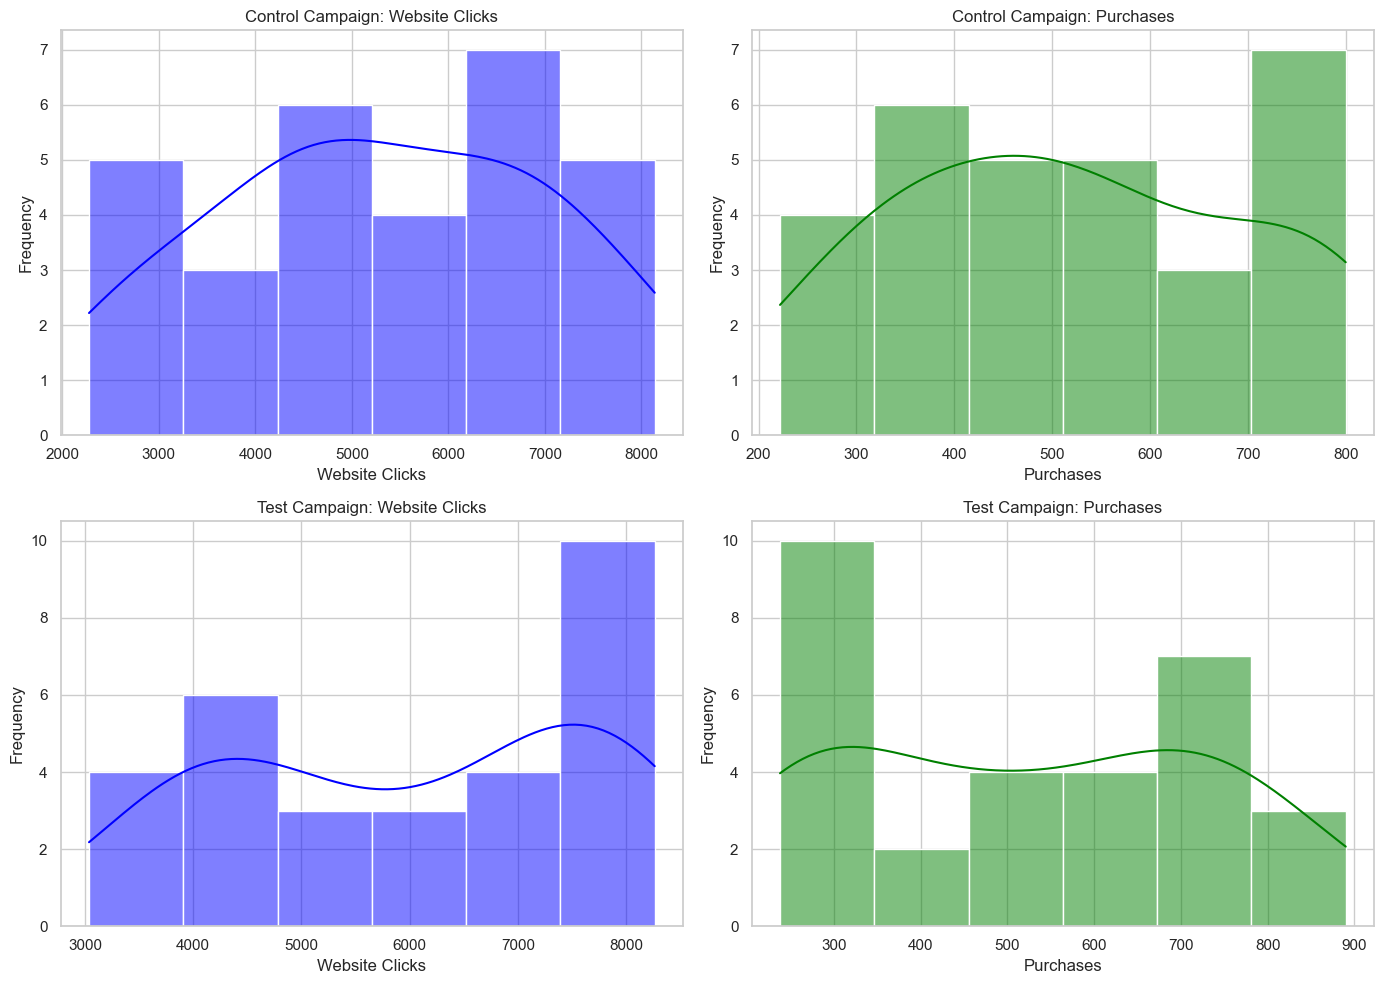

In [216]:
# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Control Website Clicks
sns.histplot(df, x='Control_WebsiteClicks', ax=axs[0, 0], kde=True, color='blue')
axs[0, 0].set_title('Control Campaign: Website Clicks')
axs[0, 0].set_xlabel('Website Clicks')
axs[0, 0].set_ylabel('Frequency')

# Plot Control Purchases
sns.histplot(df, x='Control_Purchase', ax=axs[0, 1], kde=True, color='green')
axs[0, 1].set_title('Control Campaign: Purchases')
axs[0, 1].set_xlabel('Purchases')
axs[0, 1].set_ylabel('Frequency')

# Plot Test Website Clicks
sns.histplot(df, x='Test_WebsiteClicks', ax=axs[1, 0], kde=True, color='blue')
axs[1, 0].set_title('Test Campaign: Website Clicks')
axs[1, 0].set_xlabel('Website Clicks')
axs[1, 0].set_ylabel('Frequency')

# Plot Test Purchases
sns.histplot(df, x='Test_Purchase', ax=axs[1, 1], kde=True, color='green')
axs[1, 1].set_title('Test Campaign: Purchases')
axs[1, 1].set_xlabel('Purchases')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Outlier Detection

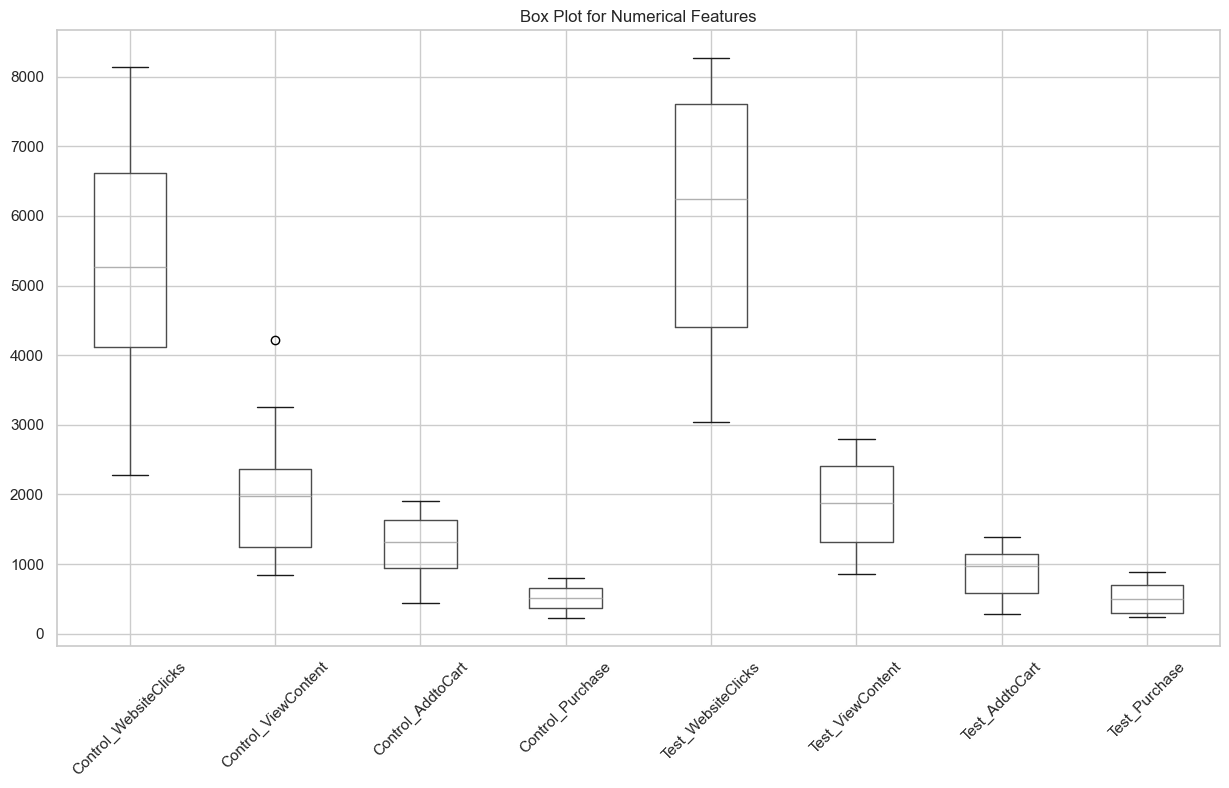

In [217]:
# List of numerical features to analyze for outliers
numeric_features = ['Control_WebsiteClicks', 'Control_ViewContent', 'Control_AddtoCart', 'Control_Purchase','Test_WebsiteClicks', 'Test_ViewContent', 'Test_AddtoCart', 'Test_Purchase']

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a box plot for each numerical feature
df[numeric_features].boxplot()

# Set the title
plt.title('Box Plot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [218]:
df['Control_Purchase']

0     618
1     511
2     372
3     340
4     522
5     764
6     499
7     462
8     501
9     734
10    475
11    794
12    766
13    788
14    366
15    438
16    222
17    243
18    542
19    299
20    800
21    387
22    766
23    585
24    386
25    251
26    605
27    643
28    334
29    670
Name: Control_Purchase, dtype: int32

In [219]:
# Define the categorization function
def conversion_category(column):
    category = []
    for i in df[column]:
        if i < 300:
            category.append('less than 300')
        elif 300 <= i < 501:
            category.append('300-500')
        elif 501 <= i < 701:
            category.append('500-700')
        else:
            category.append('More than 700')
    return category

# Apply the function to the columns
df['Control Campaign category'] = conversion_category('Control_Purchase')
df['Test Campaign category'] = conversion_category('Test_Purchase')


In [220]:

# Display the first few rows to check the new columns
df[['Control_Purchase', 'Control Campaign category', 'Test_Purchase', 'Test Campaign category']].head()

,Control_Purchase,Control Campaign category,Test_Purchase,Test Campaign category
0,618,500-700,255,less than 300
1,511,500-700,677,500-700
2,372,300-500,578,500-700
3,340,300-500,340,300-500
4,522,500-700,768,More than 700


In [221]:
df['Control Campaign category'].value_counts()

Control Campaign category
300-500          10
500-700           9
More than 700     7
less than 300     4
Name: count, dtype: int64

In [222]:
pd.DataFrame(df['Control Campaign category'].value_counts()).reset_index()

,Control Campaign category,count
0,300-500,10
1,500-700,9
2,More than 700,7
3,less than 300,4


In [223]:
control = pd.DataFrame(df['Control Campaign category'].value_counts()).reset_index().rename(columns = {'Control Campaign category':'Category'})
control

,Category,count
0,300-500,10
1,500-700,9
2,More than 700,7
3,less than 300,4


In [224]:
df['Test Campaign category'].value_counts()

Test Campaign category
less than 300    8
More than 700    8
500-700          7
300-500          7
Name: count, dtype: int64

In [225]:
Test = pd.DataFrame(df['Test Campaign category'].value_counts()).reset_index().rename(columns = {'Test Campaign category':'Category'})
Test

,Category,count
0,less than 300,8
1,More than 700,8
2,500-700,7
3,300-500,7


In [226]:
category_df =pd.merge(control,Test, on ='Category' , how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,300-500,10,7
1,500-700,9,7
2,More than 700,7,8
3,less than 300,4,8


In [227]:
category_df = category_df.iloc[[3,0,1,2]]
category_df

,Category,count_x,count_y
3,less than 300,4,8
0,300-500,10,7
1,500-700,9,7
2,More than 700,7,8


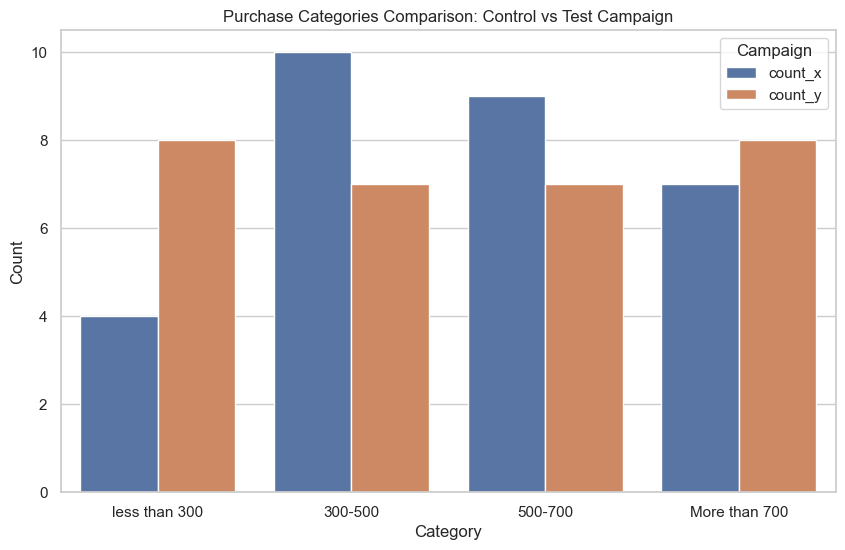

In [228]:

# Melt the DataFrame to long format for seaborn
df_melted = category_df.melt(id_vars='Category', var_name='Campaign', value_name='Count')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', hue='Campaign', data=df_melted)

# Adding titles and labels
plt.title('Purchase Categories Comparison: Control vs Test Campaign')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Campaign')

# Display the plot
plt.show()

In [229]:
category_df

,Category,count_x,count_y
3,less than 300,4,8
0,300-500,10,7
1,500-700,9,7
2,More than 700,7,8


In [230]:
df

,Date,Control_WebsiteClicks,Control_ViewContent,Control_AddtoCart,Control_Purchase,Test_WebsiteClicks,Test_ViewContent,Test_AddtoCart,Test_Purchase,Control Campaign category,Test Campaign category
0,2019-08-01,7016,2159,1819,618,3038,1069,894,255,500-700,less than 300
1,2019-08-02,8110,1841,1219,511,4657,1548,879,677,500-700,500-700
2,2019-08-03,6508,1549,1134,372,7885,2367,1268,578,300-500,500-700
3,2019-08-04,3065,982,1183,340,4216,1437,566,340,300-500,300-500
4,2019-08-05,5320,1943,1300,522,5863,858,956,768,500-700,More than 700
5,2019-08-06,4028,1249,784,764,7488,1073,882,488,More than 700,300-500
6,2019-08-07,2640,1106,1166,499,4221,2182,1301,890,300-500,More than 700
7,2019-08-08,7260,2746,930,462,7184,2194,1240,431,300-500,300-500
8,2019-08-09,6198,2179,645,501,8259,2761,1200,845,500-700,More than 700
9,2019-08-10,2277,1984,1629,734,8125,1804,424,275,More than 700,less than 300


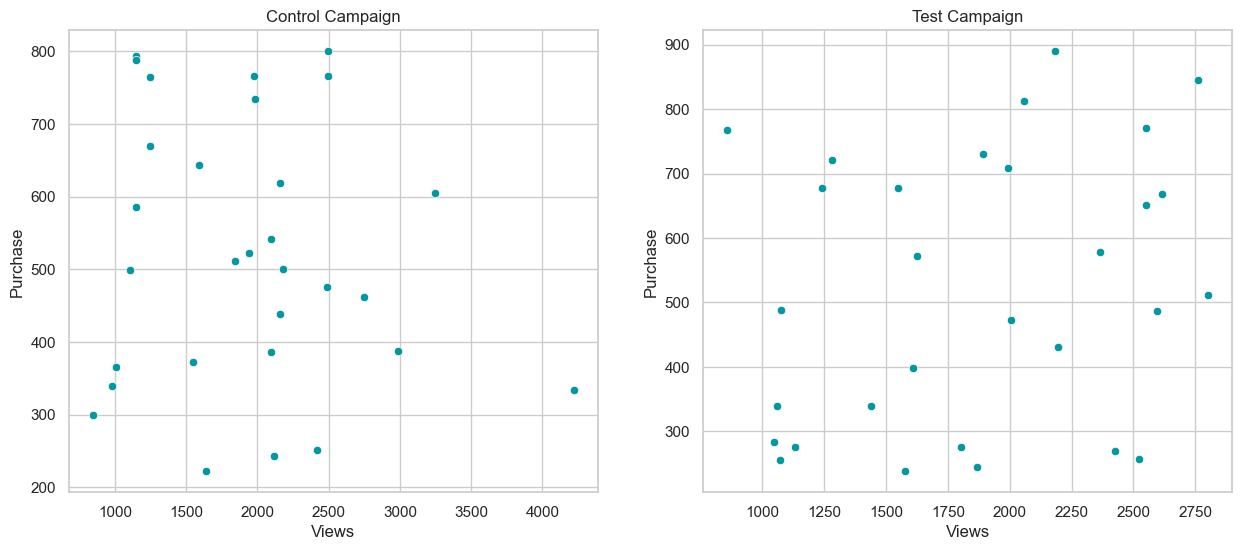

In [231]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Control Campaign')
sns.scatterplot(x=df['Control_ViewContent'],y=df['Control_Purchase'],color= '#03989E')
plt.xlabel('Views')
plt.ylabel('Purchase')
plt.subplot(1,2,2)
plt.title('Test Campaign')
sns.scatterplot(x=df['Test_ViewContent'],y=df['Test_Purchase'],color= '#03989E')
plt.xlabel('Views')
plt.ylabel('Purchase')
plt.show()

In [232]:
control_corr = df[['Control_ViewContent','Control_Purchase']].corr()
test_corr = df[['Test_ViewContent','Test_Purchase']].corr()
print('Control Campaign :',round(control_corr.values[0,1],2))
print('Test Campaign :',round(test_corr.values[0,1],2))

Control Campaign : -0.12
Test Campaign : 0.26


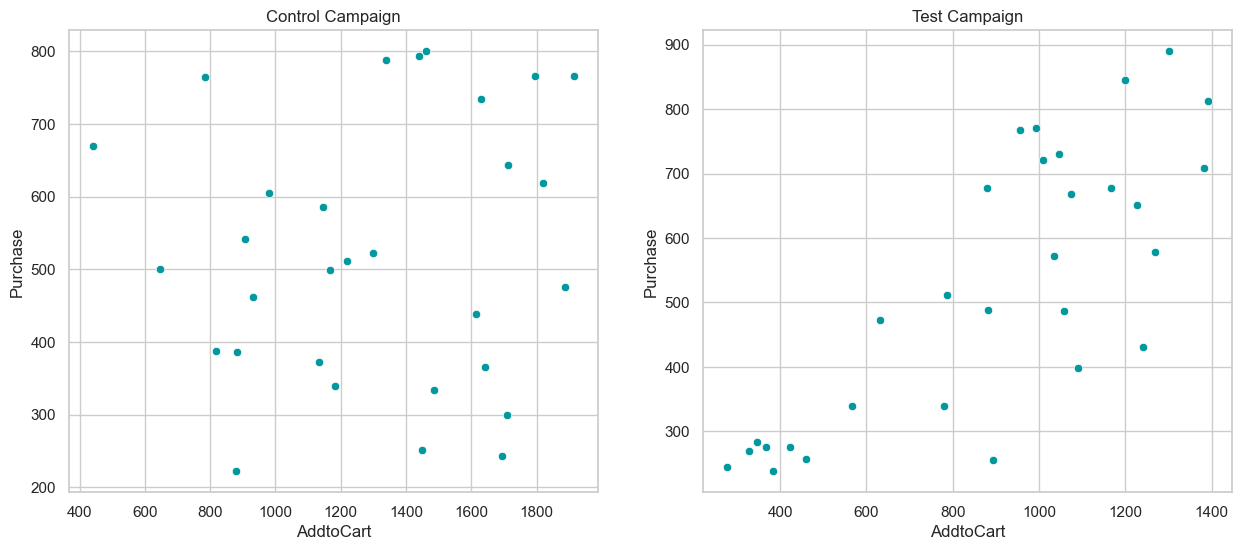

In [233]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Control Campaign')
sns.scatterplot(x=df['Control_AddtoCart'],y=df['Control_Purchase'],color= '#03989E')
plt.xlabel('AddtoCart')
plt.ylabel('Purchase')
plt.subplot(1,2,2)
plt.title('Test Campaign')
sns.scatterplot(x=df['Test_AddtoCart'],y=df['Test_Purchase'],color= '#03989E')
plt.xlabel('AddtoCart')
plt.ylabel('Purchase')
plt.show()

In [234]:
control_corr = df[['Control_AddtoCart','Control_Purchase']].corr()
test_corr = df[['Test_AddtoCart','Test_Purchase']].corr()
print('Control Campaign :',round(control_corr.values[0,1],2))
print('Test Campaign :',round(test_corr.values[0,1],2))

Control Campaign : 0.09
Test Campaign : 0.8


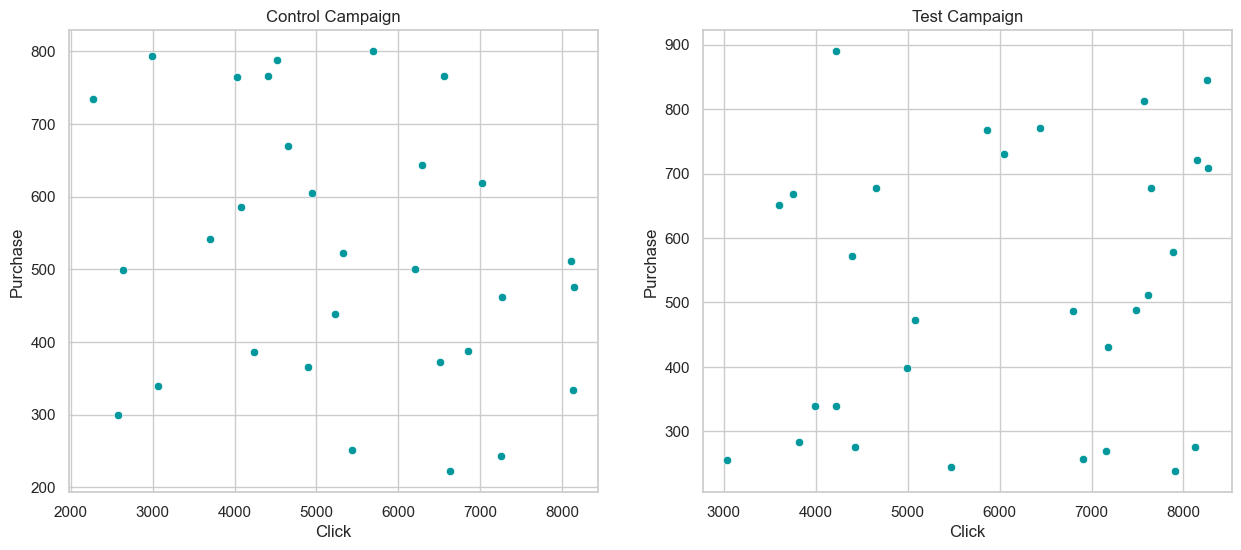

In [235]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Control Campaign')
sns.scatterplot(x=df['Control_WebsiteClicks'],y=df['Control_Purchase'],color= '#03989E')
plt.xlabel('Click')
plt.ylabel('Purchase')
plt.subplot(1,2,2)
plt.title('Test Campaign')
sns.scatterplot(x=df['Test_WebsiteClicks'],y=df['Test_Purchase'],color= '#03989E')
plt.xlabel('Click')
plt.ylabel('Purchase')
plt.show()

In [236]:
control_corr = df[['Control_WebsiteClicks','Control_Purchase']].corr()
test_corr = df[['Test_WebsiteClicks','Test_Purchase']].corr()
print('Control Campaign :',round(control_corr.values[0,1],2))
print('Test Campaign :',round(test_corr.values[0,1],2))

Control Campaign : -0.27
Test Campaign : 0.17


# Hypothesis Testing

In [237]:
print('Test campaign :', round(df['Control_Purchase'].mean(),2))
print('Control campaign :', round(df['Test_Purchase'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Control_Purchase'], b = df['Test_Purchase'], equal_var = False)
print('\nT statistic', t_stats, '\np-value',p_value)

if p_value < 0.05 :
    print("\np-value is < 0.05, Reject Null Hypothesis")
else:
    print("\np-value is > 0.05, Accept Null Hypothesis")

Test campaign : 522.77
Control campaign : 521.23

T statistic 0.030149275990700376 
p-value 0.9760537714328568

p-value is > 0.05, Accept Null Hypothesis


#We do not have sufficient evidence to conclude that the Test campaign resulted in more purchases than the Control campaign. Therefore, we fail to reject the null hypothesis.
Given the high p-value, we can conclude that the Test campaign is performing similarly to the Control campaign in terms of the number of purchases.